## **Simple Linear Regression**

In [6]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


In [7]:
#Loading Dataset
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


**Data Preprocessing**

In [8]:
df.shape

(244, 7)

In [9]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [10]:
df.info

<bound method DataFrame.info of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

In [11]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [12]:
#Checking for unique values in day column 
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [13]:
#Checking for unique values in time column 
df['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [14]:
df.isnull()

,total_bill,tip,sex,smoker,day,time,size
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
239,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False
242,False,False,False,False,False,False,False


In [15]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

No null values in the dataset


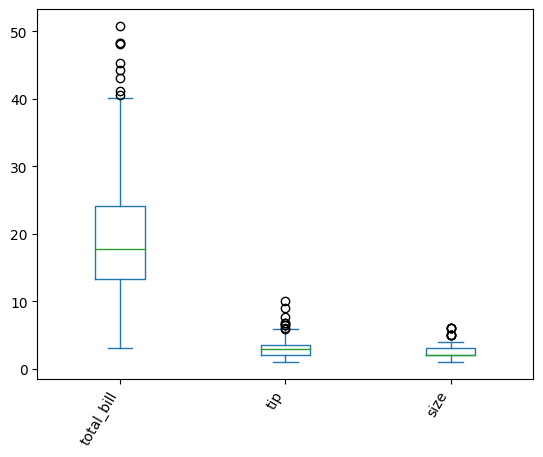

In [16]:
#Checking for outlier
df.plot.box()
plt.xticks(rotation=60, ha='right');

In [17]:
# Handle categorical variables by encoding them
df_encoded = pd.get_dummies(df, drop_first=True)
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


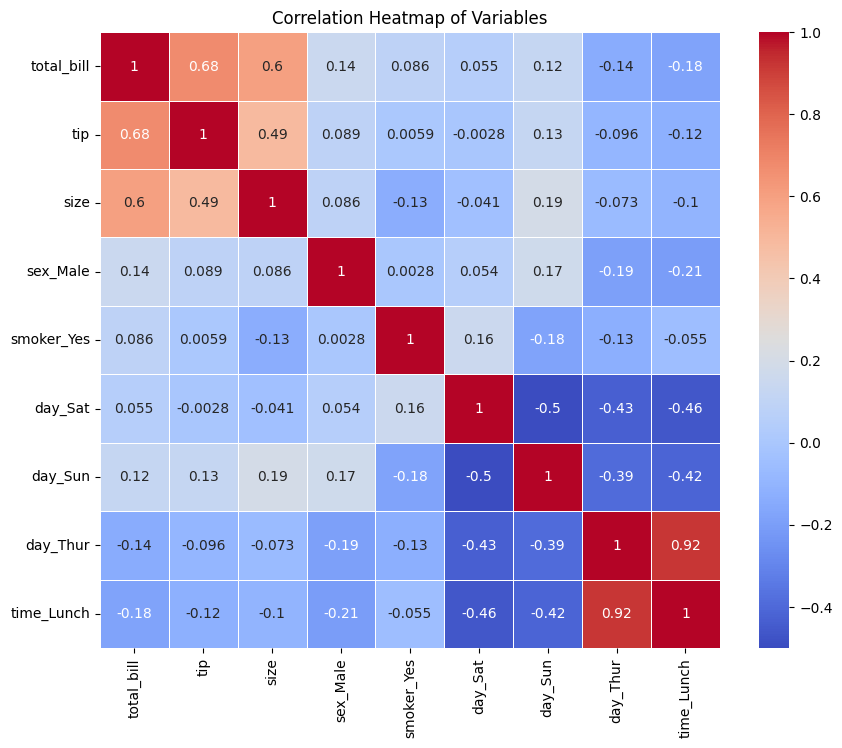

In [18]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Variables')
plt.show()

In [19]:
# Select features and target variable
X = df_encoded.drop('total_bill', axis=1)  # Feature
y = df_encoded['tip']  # Target variable

In [20]:
# Identify dependent and independent variables
X = df[['total_bill']]
y = df['tip']

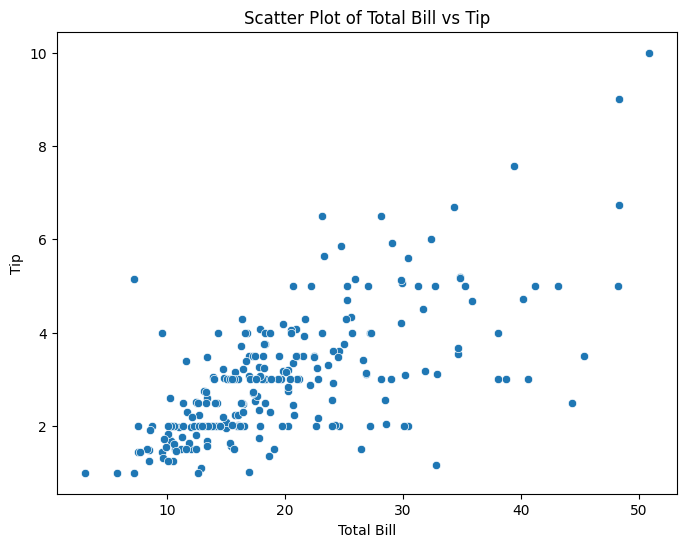

In [21]:
# Visualization: Scatter plot to show the relationship between total_bill and tip
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Scatter Plot of Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

*Normalization*

In [22]:
#Checking for Normalization
df['total_bill'].value_counts(normalize=True)

total_bill
13.42    0.012295
13.81    0.008197
15.98    0.008197
17.92    0.008197
10.07    0.008197
           ...   
24.71    0.004098
21.16    0.004098
28.97    0.004098
22.49    0.004098
18.78    0.004098
Name: proportion, Length: 229, dtype: float64

In [23]:
df['tip'].value_counts(normalize=True)

tip
2.00    0.135246
3.00    0.094262
4.00    0.049180
5.00    0.040984
2.50    0.040984
          ...   
4.34    0.004098
1.56    0.004098
5.20    0.004098
2.60    0.004098
1.75    0.004098
Name: proportion, Length: 123, dtype: float64

**Splitting Data**

In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Building Model**

In [25]:
# Build the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predict the test set results
y_pred = model.predict(X_test)

**Model Evaluation**

In [27]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.5688142529229538


In [28]:
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

R^2 Score: 0.5449381659234663


**Visualization on Regression Line**

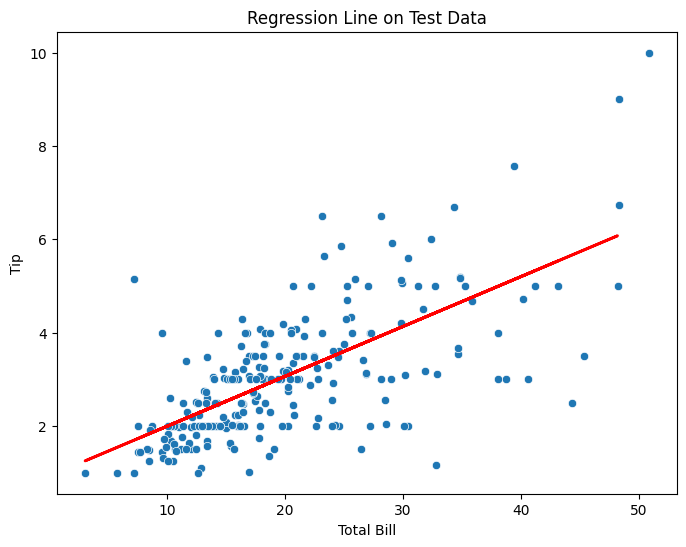

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Regression Line on Test Data')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

**Working On Additional Features**

In [30]:
# Adding size as an additional feature
X2 = df[['total_bill', 'size']]  # Features: total_bill and size
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42)

In [31]:
# Build the Linear Regression model with additional feature
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

In [32]:
# Model Evaluation with additional feature
mse2 = mean_squared_error(y_test2, y_pred2)
r2_2 = r2_score(y_test2, y_pred2)
print(f"Mean Squared Error with additional feature: {mse2}")
print(f"R^2 Score with additional feature: {r2_2}")

Mean Squared Error with additional feature: 0.6485996190543517
R^2 Score with additional feature: 0.4811084097989491


**Working On Polynomial Features**

In [33]:
# Experiment with polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [34]:
# Build the Polynomial Regression model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)
y_pred_poly = model_poly.predict(X_test_poly)

In [35]:
# Model Evaluation with polynomial features
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)
print(f"Mean Squared Error with polynomial features: {mse_poly}")
print(f"R^2 Score with polynomial features: {r2_poly}")

Mean Squared Error with polynomial features: 0.5874658712121715
R^2 Score with polynomial features: 0.5300165292317491


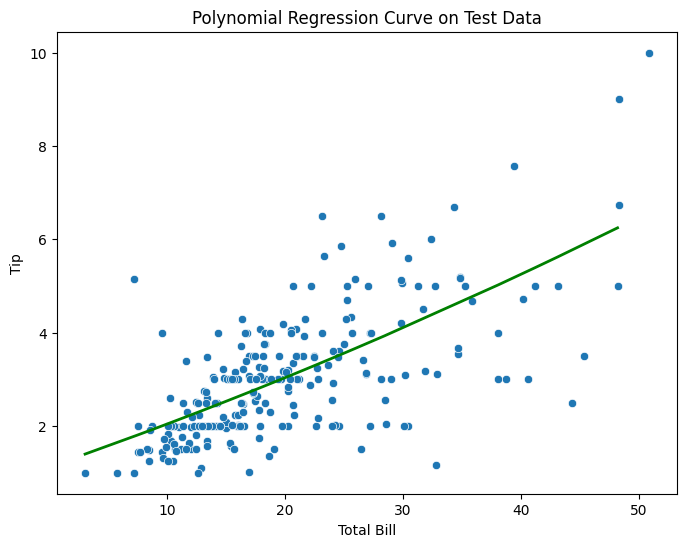

In [36]:
# Visualization: Scatter plot with polynomial regression curve
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=df)
sorted_index = np.argsort(X_test_poly[:, 1])
plt.plot(X_test_poly[:, 1][sorted_index], y_pred_poly[sorted_index], color='green', linewidth=2)
plt.title('Polynomial Regression Curve on Test Data')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

**Conclusion**

In this simple linear regression analysis, I aimed to model the relationship between the total_bill (independent variable) and tip (dependent variable) from the given dataset. Through which, I found the following key points:

<u>Correlation:</u> There is a positive correlation between total_bill and tip, as visualized in the scatter plot and confirmed by the correlation heatmap.

<u>Model Performance:</u> The initial simple linear regression model provided a basic fit, with an R^2 score indicating how well the model explains the variance in the tip.

<u>Additional Features:</u> Adding the size feature to the model slightly improved the performance, as indicated by the evaluation metrics.

<u>Polynomial Features:</u> Using polynomial features provided a better fit for the data, capturing the non-linear relationship between total_bill and tip.